In [15]:
from sklearn.datasets import load_boston # para carregar os dados
from sklearn.model_selection import train_test_split #importação para separar treino e teste
from sklearn.linear_model import LinearRegression # importa o modelo
from sklearn.metrics import mean_squared_error #métrica de erro

import matplotlib.pyplot as plt #importa biblioteca de graficos
import statsmodels.api as sm #importa biblioteca de estatística

# carrega os dados
house_data = load_boston()
X = house_data['data'] #separação dos dados que representam as features
y = house_data['target'] #separação da variável target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [16]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [17]:
print(house_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Estatisticas Descritiva de y
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 22 Oct 2022   Prob (F-statistic):          6.72e-135
Time:                        00:06:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595  

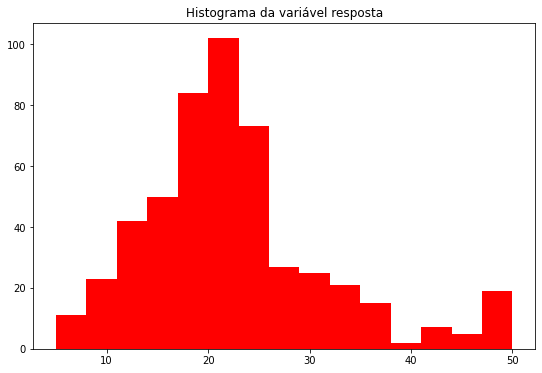

In [18]:
#Estatística Descritiva do Modelo
print("Estatisticas Descritiva de y")
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)
results = sm.OLS(y, X_sm).fit() #executa o modelo de estatistica OLS em todo o conjunto de dados.



# mostrando as estatísticas do modelo
print(results.summary())

#gráfico de histograma da variável resposta

figure=plt.figure(figsize=(9,6))
plt.hist(y,color='red', bins=15)
plt.title('Histograma da variável resposta')
plt.show()

In [19]:
#O passo seguinte é separar os dados em conjunto de teste e de treino (algoritmo supervisionado).
#Esta divisão ocorre de modo aleatório.
#Posteriormente, é criada a variável regr, responsável por criar o modelo de regressão linear.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30) #separa o treino do teste
regr = LinearRegression() # cria o modelo de regressão linear
regr.fit(X_train, y_train) # função de treino do modelo de regressão  linear


LinearRegression()

Text(0.5, 1.0, 'Histograma dos residuos da regressão')

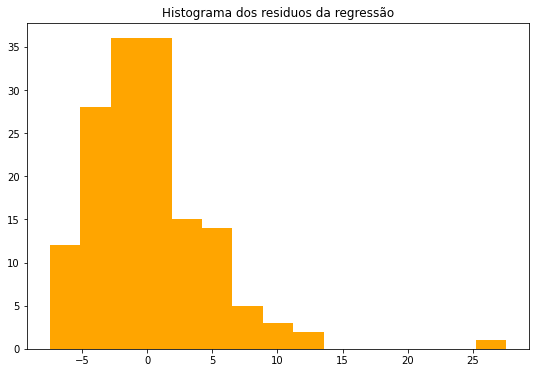

In [20]:
y_predict= regr.predict(X_test) #executa no modelo criado de regressão linear o teste

#histograma dos resíduso do teste
figure=plt.figure(figsize=(9,6))
res= y_test-y_predict #realiza a comaração entre o y atual e o predito
plt.hist(res,color='orange',bins=15)
plt.title('Histograma dos residuos da regressão')


In [21]:
#Após o modelo ser treinado e a visualização dos resíduos, é possível realizar previsões e comparar com os rótulos reais.
#Para isso, será utilizado o Coeficiente de Determinação (R^2), para mostrar o quanto da variação nos preços (variável y) é explicada pelo modelo. 

r2_train = regr.score(X_train, y_train) #calcula o score do treino
r2_test = regr.score(X_test, y_test)#calcula o score do teste

print('R^2 no set de treino: %.4f' % r2_train)
print('R^2 no set de teste: %.4f' % r2_test)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
print('Mean squared error: %.6f' % mean_squared_error(y_test, y_pred))

R^2 no set de treino: 0.7480
R^2 no set de teste: 0.7052
Mean squared error: 21.900224
